In [2]:
import numpy as np
from scipy.io.wavfile import read
from scipy import signal, arange
from scipy.signal import hilbert, find_peaks_cwt
import matplotlib.pyplot as plt
import matplotlib.axes as matax
import matplotlib.mlab as mlab
import sys
from math import exp
import operator

In [3]:
def dirDist(x):
    return np.sqrt(x**2 + (oceanDepth - auvDepth) ** 2)

In [4]:
def refDist(x):
    return np.sqrt(oceanDepth**2  + ref1helper(x)**2) + np.sqrt(auvDepth**2 + (x-ref1helper(x))**2)

In [5]:
def ref1helper(x):
    return oceanDepth*x/(oceanDepth + auvDepth)

In [6]:
def ref2Dist(x):
    return 2 * np.sqrt(oceanDepth**2 + ref2helper(x)**2) + np.sqrt((oceanDepth-auvDepth)**2 + (x-2*ref2helper(x))**2)

In [7]:
def ref2helper(x):
    return oceanDepth*x/(3*oceanDepth-auvDepth)

In [8]:
def firTimeDist(x):
    return refDist(x) - dirDist(x)

In [9]:
def secTimeDist(x):
    return ref2Dist(x) - dirDist(x)

In [10]:
oceanDepth = 50
auvDepth = 20

In [11]:
firstArrival = []
secondArrival = []
xdist = 200
for i in range(xdist):
    firstArrival.append(firTimeDist(i));
    secondArrival.append(secTimeDist(i));

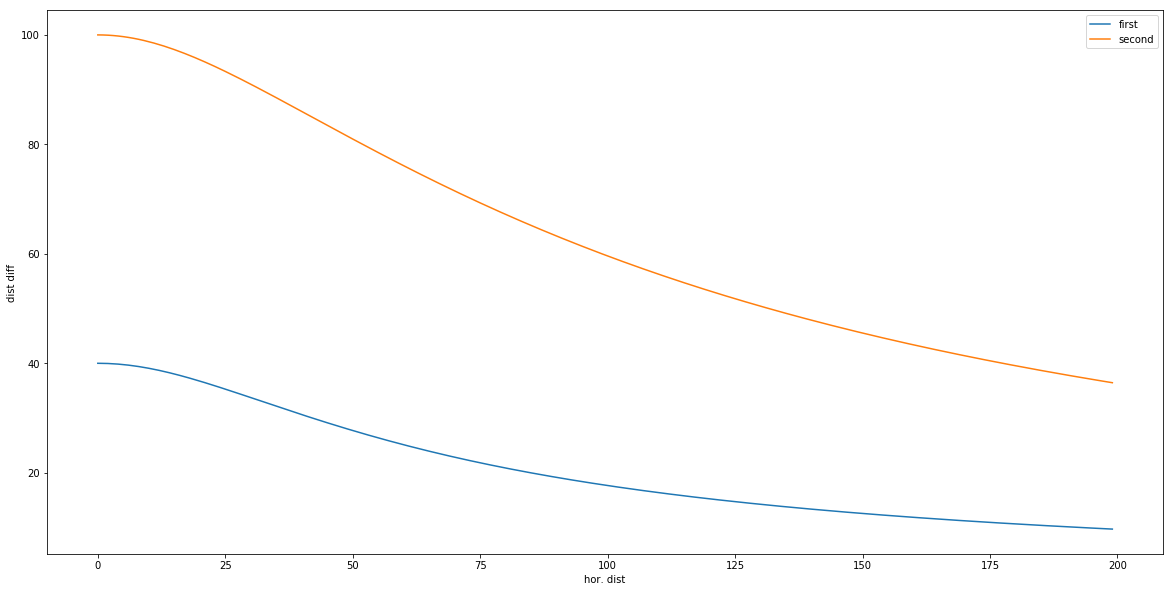

In [12]:
plt.figure(figsize=(20,10))
plt.plot(arange(xdist), firstArrival, label="first");
plt.xlabel("hor. dist");
plt.ylabel("dist diff");
plt.plot(arange(xdist), secondArrival, label="second");
plt.legend();
plt.show()